In [ ]:
"""
@Cyrille KESIKU
machine learning scientist
cyrille.kesiku@aims-senegal.org
cyrillekesiku@gmail.com
https://www.linkedin.com/in/cyrille-kesiku-396100196/

"""

# Introduction
-------------------------------------------------------------
In this work we will perform some basic calculations and the exploration and analysis of a complex network. The world we live in is composed of objects. To a certain extent we can study the link between objects of the same or different nature based on a given phenomenon. The analysis of a complex network makes it possible to study the behaviour of objects, their interaction or not and other measures that can lead to a better conclusion for the right decision, which is the main interest of this field.

In [2]:
# import of the necessary libraries 
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt 

-----------------------------------------------------------------------------------

# 1. Graph G1 computation

This first graph is undirected with 7 nodes and 8 vertices. 

-----------------------------------------------------------------------------------

[]

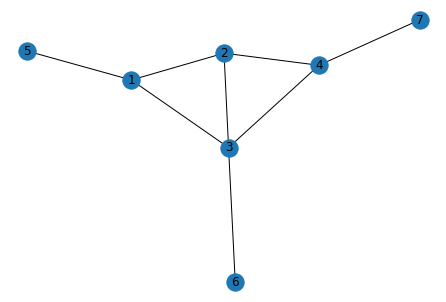

In [3]:
# Exploration of our first graph
G1=nx.Graph()
G1.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,4),(4,7),(3,6),(5,1)])
nx.draw(G1,with_labels = True)
plt.plot()

### a. The distance, eccentricity, radius, centre, Weiner index for each of the following network

same formula :

- $Eccentricity= Max \{d(u,v)\}$

- $Weiner index= \frac{1}{2} \sum_{u}\sum_{v}(u,v)$
- $Radius = \min_{u,v \in V(G)} \{d(u,v)\}$

#### a.1 The distance 

The distance in a graph is between two nodes a and b that form one or more paths. the distance calculation between these two nodes is done by first finding the shortest path among several that lead from a to b. then to do this for all nodes we will display the associated distance matrix.

In [4]:
#Associated distance matrix
distance=nx.floyd_warshall_numpy(G1,nodelist=None, weight='weight')
distance

matrix([[0., 1., 1., 2., 3., 2., 1.],
        [1., 0., 1., 1., 2., 2., 2.],
        [1., 1., 0., 1., 2., 1., 2.],
        [2., 1., 1., 0., 1., 2., 3.],
        [3., 2., 2., 1., 0., 3., 4.],
        [2., 2., 1., 2., 3., 0., 3.],
        [1., 2., 2., 3., 4., 3., 0.]])

#### a.2 eccentricity, radius, centre and Weiner_index 

In [33]:
e=nx.eccentricity(G1)
r=nx.radius(G1)
c=nx.center(G1)
w=nx.wiener_index(G1)
print('------------------------------------------------------------------------')
print('The Eccentricity or the max distance for each node is given  :',e)
print('The Radius  or the minimum eccentricity of nodes of G1 is :',r)
print('The Center  or centrals nodes of G1  are:',c)
print('The wiener_index  or the mean of de sum distance of nodes of G1 is  :',w)

------------------------------------------------------------------------
The Eccentricity or the max distance for each node is given  : {1: 3, 2: 2, 3: 2, 4: 3, 7: 4, 6: 3, 5: 4}
The Radius  or the minimum eccentricity of nodes of G1 is : 2
The Center  or centrals nodes of G1  are: [2, 3]
The wiener_index  or the mean of de sum distance of nodes of G1 is  : 40.0


In [6]:
# A other way to code the wiener index of the graph
ds=np.sum(distance,axis=1)
dss=np.sum(ds)
print('--------------------------------------')
print('The sum of distances of each node:',ds)
print('--------------------------------------')
print('wiener_index of G1:',dss/2)

--------------------------------------
The sum of distances of each node: [[10.]
 [ 9.]
 [ 8.]
 [10.]
 [15.]
 [13.]
 [15.]]
--------------------------------------
wiener_index of G1: 40.0


### b. Computation of hamultonian and eulerien path of the graph G1

We notice that this graph does not contain an eulian path because an eulian path is a path which runs all the graph passing only once vertex and whose source node is equal to the end.

And we can't calculate the Hamultonian path in this graph because it's not directed 

In [7]:
# Eulerien path
eulerien=nx.has_eulerian_path(G1)
if eulerien==True:
    print('')
    print('There is a Eulerien path Graph in G1')
else:
    print('')
    print('Sory Non Eulerien path Graph in G1')


Sory Non Eulerien path Graph in G1


### C.Computation of the clustering, global clustering, degree distribution, average path length of G1

In clustering we want to see the transitivity between objects in a network. This is done by observing the number of possible triangles that there are in the network. 

In [42]:
# clustering and global_clustering of G1

clustering = nx.clustering(G1)
global_clustering = nx.transitivity(G1)
print('')
print('---------------This is the clustering of G1--------------------------------------------------------------')
print('')
print('Clustering:',clustering)
print('')
print('-----------Here is the Global clustering of G1-----------------------------------------------------------')
print('')
print('Global_clustering, or the probability of connectivity of network nodes is ',global_clustering ,'that means', global_clustering*100,'% of probability of connection')


---------------This is the clustering of G1--------------------------------------------------------------

Clustering: {1: 0.3333333333333333, 2: 0.6666666666666666, 3: 0.3333333333333333, 4: 0.3333333333333333, 7: 0, 6: 0, 5: 0}

-----------Here is the Global clustering of G1-----------------------------------------------------------

Global_clustering, or the probability of connectivity of network nodes is  0.4 that means 40.0 % of probability of connection


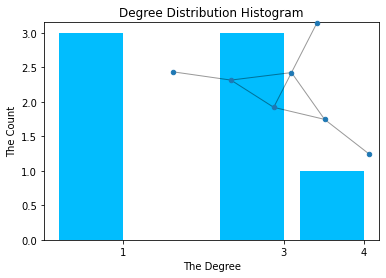

In [9]:
#The degree Distribution of G1

import collections
ds = sorted([d for n, d in G1.degree()], reverse=True)  # this line is the degree sequence
# the outpout of  degree_sequence
dcount = collections.Counter(ds)
deg, cnt = zip(*dcount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='#01BDFE')

plt.title("Degree Distribution Histogram")
plt.ylabel("The Count")
plt.xlabel("The Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
pos = nx.spring_layout(G1)
plt.axis('off')
nx.draw_networkx_nodes(G1, pos, node_size=20)
nx.draw_networkx_edges(G1, pos, alpha=0.4)

plt.show()

----------------------------------------------------------------------------------------------------
### Average path length of G is given by:

$ a= \sum_{s,t\in V}(\frac {d(s,t)}{n(n-1)})$

In [10]:
# Average path length of G1
av=nx.average_shortest_path_length (G1)
print()
print('------- The Average path length of G1 is:',av)


------- The Average path length of G1 is: 1.9047619047619047


------------------------------------------------------------------
# 2.Graph G2 Implementation
------------------------------------------------------------------

[]

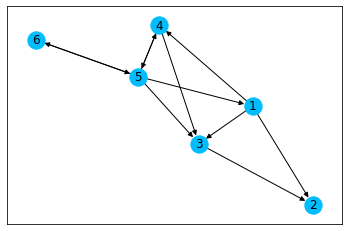

In [11]:
# ploting our graph G2
G2=nx.DiGraph()
G2.add_edges_from([(1,3),(1,2),(1,4),(4,3),(4,5),(5,1),(5,3),(5,4),(5,6),(6,5),(3,2)])
nx.draw_networkx(G2, with_label = True, node_color ='#01BDFE') 
plt.plot()

### a. The distance, eccentricity, radius, centre, Weiner index for each of the following network
$Eccentricity = Max \{d(u,v)\}$

In [12]:
#distance
distance=nx.floyd_warshall_numpy(G2,nodelist=None, weight='weight')
distance

matrix([[ 0.,  1.,  1.,  1.,  2.,  3.],
        [inf,  0.,  1., inf, inf, inf],
        [inf, inf,  0., inf, inf, inf],
        [ 2.,  1.,  2.,  0.,  1.,  2.],
        [ 1.,  1.,  2.,  1.,  0.,  1.],
        [ 2.,  2.,  3.,  2.,  1.,  0.]])


------------------------------------------------------------------------------------------------
In this case the graph is not strongly connected, there are infinite distances between some nodes which makes the maximum distance infinite, no way to calculate the center, the eccentricity , the radius and wiener_index .

In [43]:
#Found infinite path length because the digraph is not strongly connected

#e=nx.eccentricity(G2)
#r=nx.radius(G2)
#c=nx.center(G2)
w=nx.wiener_index(G2)
print('------------------------------------------------------------------------')
#print('The Eccentricity of G2 :',e)
#print('The Radius of G2 :',r)
#print('The Center of G2 :',c)
print('The wiener_index of G2 :',w)

------------------------------------------------------------------------
The wiener_index of G2 : inf


### b. Computation of hamultonian and eulerien path of the graph G2

In [14]:
# Eulerien path
eulerien=nx.has_eulerian_path(G2)
if eulerien==True:
    print('')
    print('There is a Eulerien path Graph in G2')
else:
    print('')
    print('Sory Non Eulerien path Graph in G2')


Sory Non Eulerien path Graph in G2


In [15]:
# Hamiltonian_path
from networkx.algorithms import tournament
hl=tournament.hamiltonian_path(G2)
print('------------------------------------------------')
print('The hamiltonian_path of G2 is:',hl)

------------------------------------------------
The hamiltonian_path of G2 is: [1, 3, 2, 4, 6, 5]


we can see that networkx sends us back a hamultonian path but that is not true because looking at the graph going from node 1,3, and 2 we can't go through node 4,6 and 5 because node 2 is a final node that has no possibility to continue to go through the continuation of the path to node 4,6 and 5. so no hamultonian path in this graph. 

### C.Computation of the clustering, global clustering, degree distribution, average path length of G2

----------------------------------------------------------------------
#### clustering and global_clustering of G2


In [44]:
# clustering and global_clustering of G2

clustering = nx.clustering(G2)
global_clustering = nx.transitivity(G2)
print('')
print('---------------This is the clustering of G2--------------------------------------------------------------')
print('')
print('Clustering:',clustering)
print('')
print('-----------Here is the Global clustering of G2-----------------------------------------------------------')
print('')
print('Global_clustering, or the probability of connectivity of network nodes is ',global_clustering ,'that means', global_clustering*100,'% of probability of connection')


---------------This is the clustering of G2--------------------------------------------------------------

Clustering: {1: 0.4166666666666667, 3: 0.4166666666666667, 2: 0.5, 4: 0.5, 5: 0.19230769230769232, 6: 0}

-----------Here is the Global clustering of G2-----------------------------------------------------------

Global_clustering, or the probability of connectivity of network nodes is  0.3 that means 30.0 % of probability of connection


#### The degree Distribution of G2


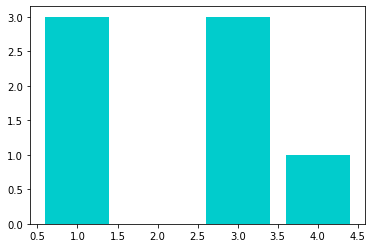

In [28]:
dd=nx.degree_histogram(G2)
plt.bar(deg, cnt, width=0.80, color='#01CCCC')
plt.show()


----------------------------------------------------------------------------------------------------
### Average path length of G is given by:

$ a= \sum_{s,t\in V}(\frac {d(s,t)}{n(n-1)})$

In [18]:
# Average path length of G1
av=nx.average_shortest_path_length (G2)
print()
print('------- The Average path length of G1 is:',av)


------- The Average path length of G1 is: 1.1


# Conclusion 
-----------------------------------------------------

As we said in our introduction, the connection of objects in the universe for a given context can summarize many situations and give us a better idea during an analysis. this python code exercise is very interesting, because it allows us to familiarize ourselves with the numerical construction of a graph or a network with the dedicated library named Networkx. with this library we can play well with graphs. But also other libraries like matplotlib for visualization and numpy for matrix calculation.